# Mathematical Chemistry Homework

Packages used for homework:

In [ ]:
import requests
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdmolops
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

## TASK 1
S-indacene and as-indacene are polycyclic hydrocarbons with their respective chemical
formulas C12H8 and C13H9 (see also https://pubchem.ncbi.nlm.nih.gov/compound/5460734 and https://pubchem.ncbi.nlm.nih.gov/compound/5460727).

For each of these compounds do the following:

(a) Draw the Huckel graph (i.e. hydrogen-depleted graph).

(b) Calculate the eigenvalues of the Huckel graph and their corresponding eigenvectors.

(c) Visualise the first three molecular orbitals (the first three with the lowest energy).
Sizes of the lobes should be approximately proportional to absolute values of corresponding coefficients. (Also, I suggest that you colour the two lobes using two
different colours.)

(d) Draw the visualisation of energy levels of the molecular orbitals and assign electrons
to the orbitals (for the ground state configuration).

(e) Determine the total π energy Eπ =
Pn
i=1 viλi (for the ground state configuration)
and the graph energy EG =
Pn
i=1 |λi
|.

(f) Determine the Coulson π bond order for each edge of the H¨uckel graph. The Coulson
π bond order between atoms r and s is defined as
P
π
rs =
Xn
i=1
vic
(i)
r
c
(i)
s
,
where c
(i)
r is the entry in the i-th eigenvector that corresponds to atom r. Then label
edges of the H¨uckel graph with those values. Is symmetry of the molecule reflected
in these values or are they completely unrelated to symmetry of the molecule?


### Functions used for Task 1

In [109]:
# get smiles from NCBI molecule id
def get_molecule_smiles(id):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/CID/{id}/property/CanonicalSMILES/TXT"
    response = requests.get(url)
    return response.text.strip()

def smiles_to_adj_matrix(smiles):
    mol = Chem.MolFromSmiles(smiles)
    adj_matrix = rdmolops.GetAdjacencyMatrix(mol)
    return adj_matrix, mol

def get_eigen(adj_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(adj_matrix)
    return eigenvalues, eigenvectors

def visualize_molecule(mol):
    img = Draw.MolToImage(mol, size=(300, 300))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def visualize_molecular_orbitals(mol, eigenvectors, n_orbitals):
    fig, axes = plt.subplots(1, n_orbitals, figsize=(5 * n_orbitals, 5))
    for i in range(n_orbitals):
        orbital = eigenvectors[:, len(eigenvectors)-1-i]
        mol_copy = Chem.Mol(mol)
        orbital_str = ', '.join(f'{x:.2f}' for x in orbital)
        mol_copy.SetProp(f'Orbital {i+1}', orbital_str)
        # add labels to atoms
        for j in range(mol_copy.GetNumAtoms()):
            atom = mol_copy.GetAtomWithIdx(j)
            atom.SetProp('atomNote', f'{orbital[j]:.2f}')
        
        img = Draw.MolToImage(mol_copy, size=(300, 300))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Orbital {i+1}')
    plt.show()

def plot_energy_levels(eigenvalues, n_electrons):
    fig, ax = plt.subplots(figsize=(5, 7))
    for i, e in enumerate(eigenvalues):
        ax.plot([0, 1], [e, e], color='black')
        if i < n_electrons // 2:
            # bug for float values
            if abs(eigenvalues[i] - eigenvalues[i+1]) < 0.0000001:
                ax.plot(0.40, e, marker='o', color='blue')
                ax.plot(0.60, e, marker='o', color='red')
            ax.plot(0.45, e, marker='o', color='red')
            ax.plot(0.55, e, marker='o', color='blue')
    ax.set_xlabel('Orbital')
    ax.set_ylabel('Energy')
    ax.set_title('Energy Levels')
    plt.show()

def calculate_total_pi_energy(eigenvalues, n_electrons):
    eigenvalues = np.sort(eigenvalues)[::-1]
    total_pi_energy = 2 * sum(eigenvalues[:n_electrons // 2])
    return total_pi_energy

def calculate_graph_energy(eigenvalues):
    graph_energy = sum(abs(e) for e in eigenvalues)
    return graph_energy

def calculate_coulson_pi_bond_order(adj_matrix, eigenvectors, n_electrons):
    num_atoms = adj_matrix.shape[0]
    bond_order_matrix = np.zeros((num_atoms, num_atoms))
    
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):
            if adj_matrix[i, j] == 1:  # only calculate for bonded atoms
                bond_order = 0
                for k in range(n_electrons // 2):
                    bond_order += 2 * eigenvectors[k, i] * eigenvectors[k, j]
                bond_order_matrix[i, j] = bond_order_matrix[j, i] = bond_order
    
    return bond_order_matrix

def visualize_graph_with_bond_orders(adj_matrix, bond_order_matrix):
    G = nx.from_numpy_array(adj_matrix)
    
    edge_labels = {}
    for i in range(len(adj_matrix)):
        for j in range(i + 1, len(adj_matrix)):
            if adj_matrix[i, j] == 1:
                edge_labels[(i, j)] = f'{bond_order_matrix[i, j]:.2f}'
    
    pos = nx.spring_layout(G)    
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
    plt.title("Molecule Graph with Coulson pi Bond Orders")
    plt.show()
   

### Results for S-indacene

In [128]:
id = 5460734
n_electrons = 12

(a) Draw the Huckel graph (i.e. hydrogen-depleted graph).

SMILES: C1=CC2=CC3=CC=CC3=CC2=C1
Adjacency Matrix:
[[0 1 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 1 0]
 [0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 1 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 0]]
Graph:


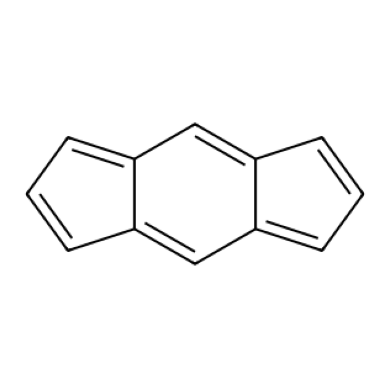

In [129]:
smiles = get_molecule_smiles(id)
adj_matrix, mol = smiles_to_adj_matrix(smiles)
print("SMILES:", smiles)
print("Adjacency Matrix:")
print(adj_matrix)
print("Graph:")
visualize_molecule(mol)

(b) Calculate the eigenvalues of the H¨uckel graph and their corresponding eigenvectors.

In [130]:
eigenvalues, eigenvectors = get_eigen(adj_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[-2.30277564e+00 -1.75659825e+00 -1.61803399e+00 -1.61803399e+00
 -8.20249251e-01  4.57922811e-16  6.18033989e-01  6.18033989e-01
  1.13856427e+00  1.30277564e+00  2.00000000e+00  2.43828324e+00]
Eigenvectors:
[[-1.13181686e-17  3.77206026e-01 -2.05987265e-02  4.46738953e-01
  -3.21573113e-01 -1.86561603e-17  4.47184577e-01 -5.09448095e-03
  -4.68528562e-01 -6.65162704e-18 -3.16227766e-01  1.86513630e-01]
 [-1.73523522e-01 -3.31299723e-01  2.79251288e-01 -3.49311778e-01
   1.31885052e-01  4.08248290e-01  1.43032773e-01  4.23723525e-01
  -2.66724939e-01 -2.30700934e-01 -3.16227766e-01  2.27386529e-01]
 [ 3.99585738e-01  2.04754489e-01 -4.31239349e-01  1.18459376e-01
   2.13394498e-01  1.69520309e-17 -3.58785462e-01  2.66970021e-01
   1.64845078e-01 -3.00551556e-01 -3.16227766e-01  3.67919132e-01]
 [-3.47047043e-01 -2.33126145e-01  1.04186042e-16  7.74409995e-16
  -5.20316227e-01 -4.08248290e-01 -6.78485097e-17  1.33614602e-16
   2.89566576e-01 -4.61401867e-01 -1.44706748e-1

(c) Visualise the first three molecular orbitals (the first three with the lowest energy).
Sizes of the lobes should be approximately proportional to absolute values of corresponding coefficients. (Also, I suggest that you colour the two lobes using two
different colours.)

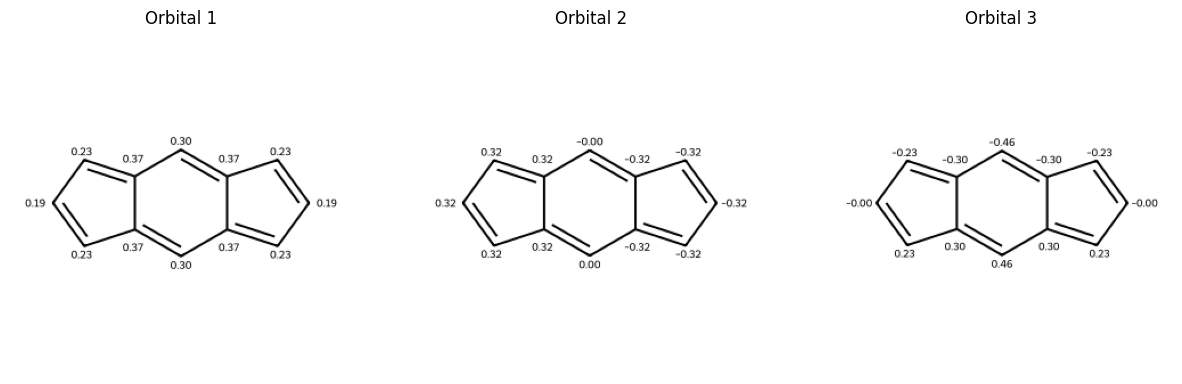

In [131]:
visualize_molecular_orbitals(mol, eigenvectors, 3)

(d) Draw the visualisation of energy levels of the molecular orbitals and assign electrons
to the orbitals (for the ground state configuration).

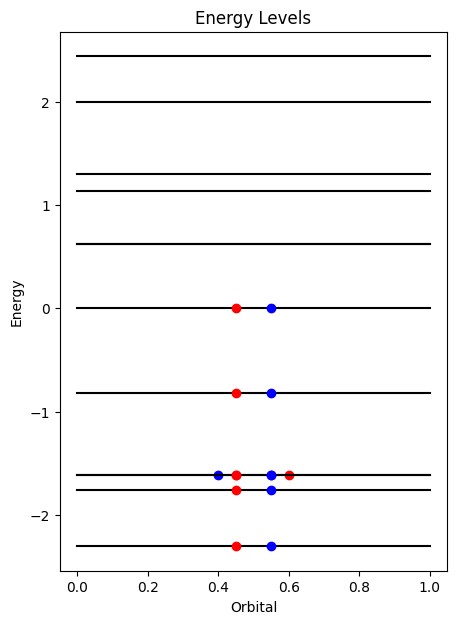

In [132]:
plot_energy_levels(eigenvalues, n_electrons)

(e) Determine the total π energy Eπ =
Pn
i=1 viλi (for the ground state configuration)
and the graph energy EG =
Pn
i=1 |λi
|.

In [133]:
total_pi_energy = calculate_total_pi_energy(eigenvalues, n_electrons)
print("Total pi Energy (Epi):", total_pi_energy)

Total pi Energy (Epi): 16.231382239489704


In [134]:
graph_energy = calculate_graph_energy(eigenvalues)
print("Graph Energy (EG):", graph_energy)

Graph Energy (EG): 16.231382239489708


(f) Determine the Coulson π bond order for each edge of the H¨uckel graph. The Coulson
π bond order between atoms r and s is defined as
P
π
rs =
Xn
i=1
vic
(i)
r
c
(i)
s
,
where c
(i)
r is the entry in the i-th eigenvector that corresponds to atom r. Then label
edges of the H¨uckel graph with those values. Is symmetry of the molecule reflected
in these values or are they completely unrelated to symmetry of the molecule?

Coulson pi Bond Order Matrix For Edges:
[[ 0.00000000e+00 -7.19032552e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.20765851e-01]
 [-7.19032552e-01  0.00000000e+00  1.55399275e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.55399275e-02  0.00000000e+00  6.12924939e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.05279159e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  6.12924939e-01  0.00000000e+00
   2.87318472e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.87318472e-01
   0.00000000e+00 -6.40203809e-01  0.00000000e+00  0.00000000e+00
   2.22044605e-16  0.00000000e+0

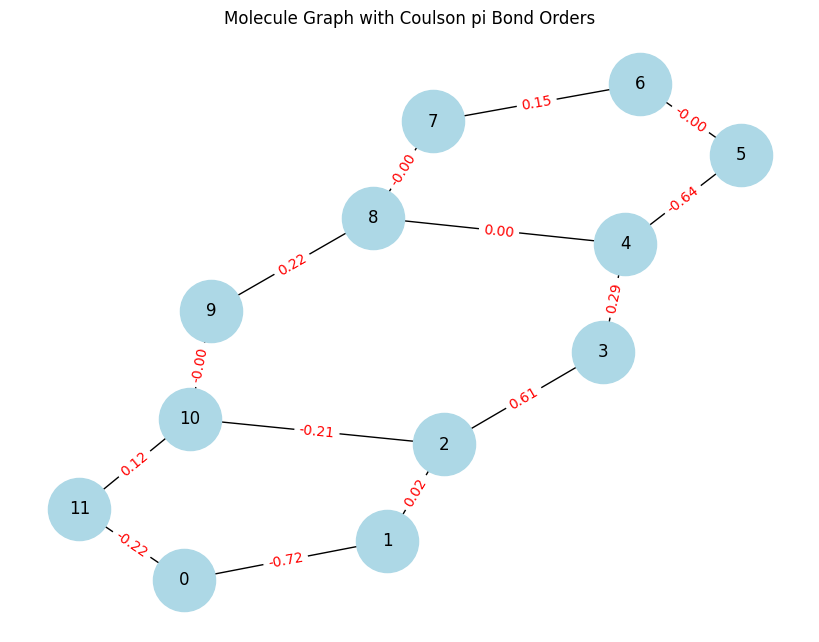

In [136]:
bond_order_matrix = calculate_coulson_pi_bond_order(adj_matrix, eigenvectors[::-1], n_electrons)
print("Coulson pi Bond Order Matrix For Edges:")
print(bond_order_matrix)
visualize_graph_with_bond_orders(adj_matrix,bond_order_matrix)

### Results for As-indacene

In [118]:
id = 5460727
n_electrons = 12

(a) Draw the Huckel graph (i.e. hydrogen-depleted graph).

SMILES: C1=CC2=C3C=CC=C3C=CC2=C1
Adjacency Matrix:
[[0 1 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 1 0]
 [0 0 1 0 1 0 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 1 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 1 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 0]]
Graph:


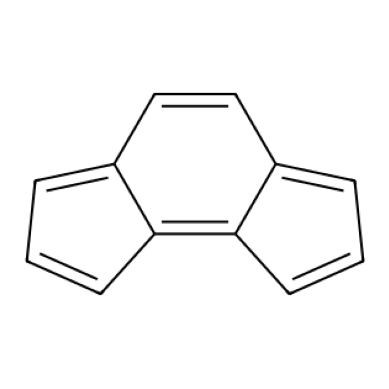

In [119]:
smiles = get_molecule_smiles(id)
adj_matrix, mol = smiles_to_adj_matrix(smiles)
print("SMILES:", smiles)
print("Adjacency Matrix:")
print(adj_matrix)
print("Graph:")
visualize_molecule(mol)

(b) Calculate the eigenvalues of the H¨uckel graph and their corresponding eigenvectors.

In [120]:
eigenvalues, eigenvectors = get_eigen(adj_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[-2.31874721 -1.75587981 -1.69962815 -1.41421356 -1.          0.23912328
  0.30457422  0.83233494  1.          1.41421356  1.93771787  2.46050487]
Eigenvectors:
[[-1.69973950e-02 -3.77597422e-01 -3.37148816e-01  3.10937912e-01
  -2.67261242e-01 -2.02428463e-01 -2.52634281e-01  3.38858709e-01
  -4.08248290e-01  2.14883126e-01  3.27190157e-01 -1.89287041e-01]
 [ 1.99211136e-01  3.50793883e-01  1.44748342e-01 -4.39732612e-01
   4.71844785e-16 -3.65792727e-01  3.36753766e-01  3.80712708e-01
  -3.88578059e-16  3.03890631e-01  2.80915129e-01 -2.43986297e-01]
 [-4.44922871e-01 -2.38354476e-01  9.11304603e-02  3.10937912e-01
   2.67261242e-01  1.14958907e-01  3.55200795e-01 -2.19782207e-02
   4.08248290e-01  2.14883126e-01  2.17144108e-01 -4.11042430e-01]
 [ 4.44922871e-01  2.38354476e-01  9.11304603e-02  3.10937912e-01
  -2.67261242e-01  1.14958907e-01 -3.55200795e-01  2.19782207e-02
   4.08248290e-01  2.14883126e-01 -2.17144108e-01 -4.11042430e-01]
 [-1.99211136e-01 -3.50793883e

(c) Visualise the first three molecular orbitals (the first three with the lowest energy).
Sizes of the lobes should be approximately proportional to absolute values of corresponding coefficients. (Also, I suggest that you colour the two lobes using two
different colours.)

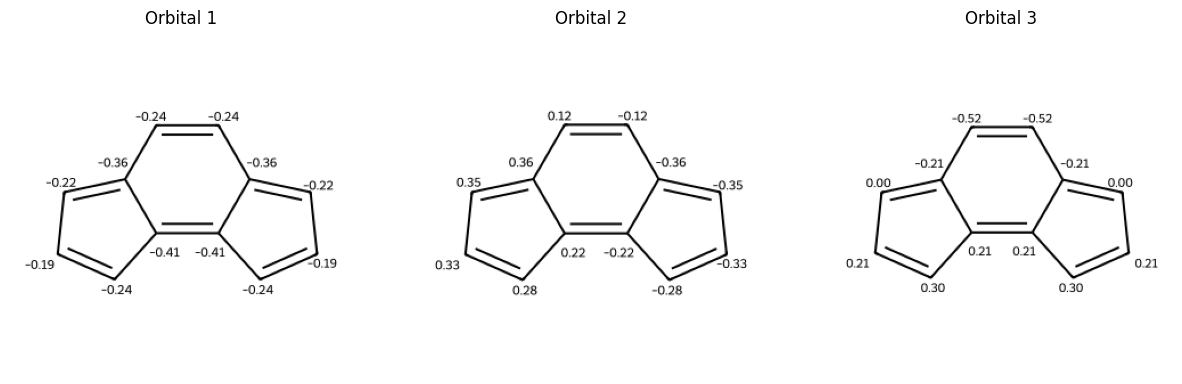

In [121]:
visualize_molecular_orbitals(mol, eigenvectors, 3)

(d) Draw the visualisation of energy levels of the molecular orbitals and assign electrons
to the orbitals (for the ground state configuration).

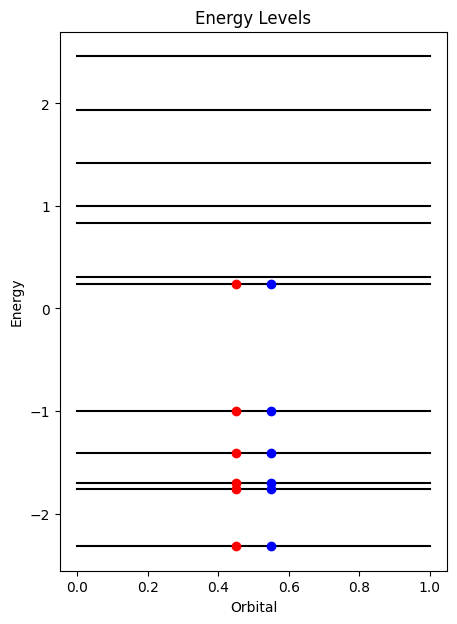

In [122]:
plot_energy_levels(eigenvalues, n_electrons)

(e) Determine the total π energy Eπ =
Pn
i=1 viλi (for the ground state configuration)
and the graph energy EG =
Pn
i=1 |λi
|.

In [123]:
total_pi_energy = calculate_total_pi_energy(eigenvalues, n_electrons)
print("Total pi Energy (Epi):", total_pi_energy)

Total pi Energy (Epi): 15.898690915081824


In [124]:
graph_energy = calculate_graph_energy(eigenvalues)
print("Graph Energy (EG):", graph_energy)

Graph Energy (EG): 16.37693747159494


(f) Determine the Coulson π bond order for each edge of the H¨uckel graph. The Coulson
π bond order between atoms r and s is defined as
P
π
rs =
Xn
i=1
vic
(i)
r
c
(i)
s
,
where c
(i)
r is the entry in the i-th eigenvector that corresponds to atom r. Then label
edges of the H¨uckel graph with those values. Is symmetry of the molecule reflected
in these values or are they completely unrelated to symmetry of the molecule?

Coulson pi Bond Order Matrix For Edges:
[[ 0.00000000e+00 -7.29398313e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.11022302e-16]
 [-7.29398313e-01  0.00000000e+00 -9.21485110e-15  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -9.21485110e-15  0.00000000e+00  5.60588001e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.99680289e-15  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  5.60588001e-01  0.00000000e+00
   1.38588010e-15  0.00000000e+00  0.00000000e+00  3.17374241e-16
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.38588010e-15
   0.00000000e+00 -7.63278329e-15  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+0

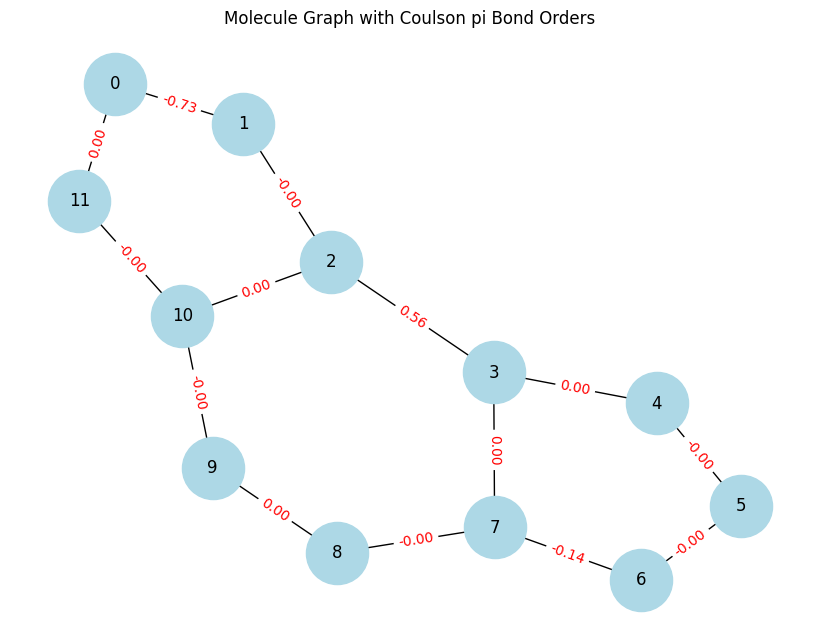

In [125]:
bond_order_matrix = calculate_coulson_pi_bond_order(adj_matrix, eigenvectors[::-1], n_electrons)
print("Coulson pi Bond Order Matrix For Edges:")
print(bond_order_matrix)
visualize_graph_with_bond_orders(adj_matrix,bond_order_matrix)

## TASK 2
Let P30 be the path graph on 30 vertices. Vertices are consecutively labeled 1, 2, . . . , 30.
Calculate eigenvectors that correspond to the lowest three energy levels (i.e. the largest
three eigenvalues). Then plot those three eigenvectors on the same plot (where the x-axis
contains vertex labels 1, 2, . . . , 30). (Do those lines resemble any known functions?)

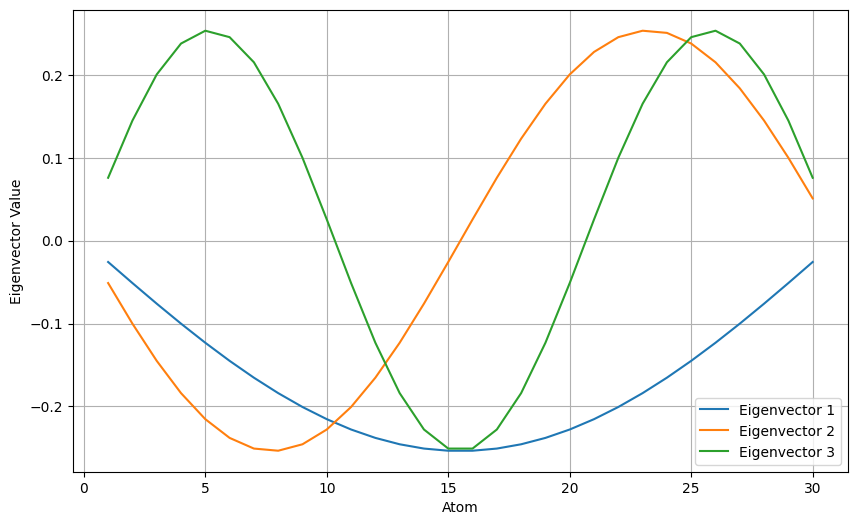

In [126]:
n_vertices = 30

# adjacency matrix
adj_matrix = np.zeros((n_vertices, n_vertices), dtype=int)
for i in range(n_vertices - 1):
    adj_matrix[i, i + 1] = 1
    adj_matrix[i + 1, i] = 1

# get eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(adj_matrix)

# sort eigenvectors
sorted = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted]

# select first three with lowest energy level
first_three = [0, 1, 2]
first_three_eigenvectors = eigenvectors_sorted[:, first_three]

# visualization
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(np.arange(1, n_vertices + 1), first_three_eigenvectors[:, i], label=f'Eigenvector {i+1}')

plt.xlabel('Atom')
plt.ylabel('Eigenvector Value')
plt.legend()
plt.grid(True)
plt.show()


Top plot resembles sin and cosine functions